In [111]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import statsmodels.formula.api as smf
from sklearn import linear_model, tree, ensemble, metrics, externals, cross_validation
# logistic regression is part of sklearn - linear model

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [112]:
df = pd.read_csv(os.path.join('C:\Users\morgane1\Desktop\policefatalities.csv'))

In [113]:
df

,Name,Cause of Death,Date of Death,State,City,...,Month of Death,Year of Death,Was the deceased armed?,Did the deceased have priors?,Was the officer involved fired or suspended?
0,Hue Dang,Car Accident,11/3/2015,New Jersey,"Hackensack, New Jersey",...,March,2015,No,Unclear,Unclear
1,Jacqueline Reynolds,Car Accident,8/5/2013,Illinois,"Chicago, Illinois",...,13-May,2013,No,No,No
2,Bernard Moore,Car Accident,6/3/2015,Georgia,"Atlanta, Georgia",...,March,2015,No,Unclear,Unclear
3,Michael Barnes,Car Accident,4/10/2013,Pennsylvania,"Pittsburgh, Pennsylvania",...,13-Oct,2013,No,No,Yes
4,Briant Paula,Car Accident,23/08/2014,Massachusetts,"Lawrence, Massachusetts",...,14-Aug,2014,No,Unclear,Yes
...,...,...,...,...,...,...,...,...,...,...,...
2350,Unknown (68),Shooting,1/12/2014,Texas,"Harris County, Texas",...,14-Dec,2014,Yes,Unclear,Unclear
2351,Unknown (69),Shooting,3/12/2014,California,"Los Angeles, California",...,14-Dec,2014,Yes,Unclear,Unclear
2352,Zheng Diao,Taser Gun,21/08/2013,Minnesota,"St. Louis Park, Minnesota",...,13-Aug,2013,Yes,Unclear,Unclear
2353,John Wrana,Taser Gun,27/07/2013,Illinois,"Park Forest, Illinois",...,13-Jul,2013,Yes,Unclear,Unclear


In [114]:
df.shape

(2355, 15)

In [115]:
list(df.columns.values)

['Name',
 'Cause of Death',
 'Date of Death',
 'State',
 'City',
 'Gender',
 'Age',
 'Race',
 'Photo',
 'News Story',
 'Month of Death',
 'Year of Death',
 'Was the deceased armed?',
 'Did the deceased have priors?',
 'Was the officer involved fired or suspended?']

In [116]:
df = df.rename(columns = {'Cause of Death':'cause_death', 'Date of Death': 'date_death', 'Month of Death': 'month_death', 'Year of Death':'year_death','Was the deceased armed?':'armed', 'Did the deceased have priors?':'priors','Was the officer involved fired or suspended?':'fired'})

In [117]:
list(df.columns.values)

['Name',
 'cause_death',
 'date_death',
 'State',
 'City',
 'Gender',
 'Age',
 'Race',
 'Photo',
 'News Story',
 'month_death',
 'year_death',
 'armed',
 'priors',
 'fired']

>### Dropping unnecessary columns. 

The columns that I am choosing to drop are:
Name
Date of Death - of the victim
City
News Story
Photo
Month of Death - of the victim
Year of Death - of the victim

I am dropping name because it's not analyzable
I am dropping all the dates because I did an analysis of how many deaths there were per year in Tableau and will be using those visualizations for my presentation. 
I am dropping City primarily because I don't have time to analyze it, if I had more time I would definitely use this, I wanted to look at population density in this manner, and may do this at a later date.
I am dropping Photo and News Story because while these are nice references, I am not sure they are analyzable for me at this time, though they could definitely be use to fill in some of the empty variables with sufficient time. 

In [118]:
df.drop(['Name', 'date_death','City','News Story','Photo','month_death','year_death'], axis=1, inplace=True)
df.head()

,cause_death,State,Gender,Age,Race,armed,priors,fired
0,Car Accident,New Jersey,Female,64.0,Asian,No,Unclear,Unclear
1,Car Accident,Illinois,Female,54.0,Black,No,No,No
2,Car Accident,Georgia,Male,62.0,Black,No,Unclear,Unclear
3,Car Accident,Pennsylvania,Male,49.0,Black,No,No,Yes
4,Car Accident,Massachusetts,Male,26.0,Black,No,Unclear,Yes


In [119]:
#bucket the ages by groups. - ranges 
df.Age.value_counts()

26.0     86
34.0     81
27.0     79
28.0     76
29.0     75
         ..
97.0      1
95.0      1
93.0      1
77.0      1
107.0     1
Name: Age, dtype: int64

In [120]:
print df.Age.mean()
print df.Age.median()
print df.Age.max()
print df.Age.min()

36.9122422115
34.0
107.0
5.0


I wanted to look at this to determine if there were outliers. This is the only numeric data in the dataframe now and so it was the only column through which I could find them. 107 was an outlier, I used the photo attached and while the man was old I did not think he was 107 and unfortunately the article that was attached was no longer accessible. Because I could no longer confirm that he was in fact 107, I dropped this line item from my data. 

In [121]:
print df[(df.Age == 107)]

    cause_death     State Gender    Age   Race armed   priors    fired
946    Shooting  Arkansas   Male  107.0  Black   Yes  Unclear  Unclear


In [122]:
# have to actually drop the age 107 line I think.

>### Distribution of police involved fatalities by state. 

In [123]:
df.State.value_counts()
#could just look at california and texas (or look at top 5)
#could also look at red / blue states 

California        398
Texas             237
Florida           187
Arizona           104
Oklahoma           68
                 ... 
New Hampshire       4
Vermont             2
Rhode Island        2
Virgin Islands      2
North Dakota        1
Name: State, dtype: int64

I considered cutting the data based on geographic location, however given I only had 2000 lines of data to begin with it was difficult to justify removing them and giving up lines of data when I was already limited. While I didn't do this here I also would have liked to perhaps categorize the states based on dueling characteristics of California or Texas along perhaps racial lines, relatonal (police-community) lines, or legal lines. However I did not have the time to do the research to make a good case for how I was going to do this. 

Rergardless it is interesting, albeit maybe not that surprising, that California and Texas were the locations with the most police involved fatalities over the course of the last ~3 years. 

It is also amazing and encouraging that, assuming this is an entirely comprehensive list, some states only had one police involved fatality in the last ~3 years. 

One might make an inference about the fact that California and Texas are both massive states with high immigrant populations that border Mexico. - This should be kept in mind when looking at the distribution of police involved fatalities by race. 

>### Distribution of victims of police involved fatalities where the victim was armed, not armed, or it was unclear whether or not they were armed.

In [124]:
df.armed.value_counts()

Yes        1482
Unclear     598
No          275
Name: armed, dtype: int64

>### Distribution of victims of police involved fatalities where the victim had priors, did not have priors, or it was unclear whether or not the victim had priors

In [125]:
df.priors.value_counts()

Unclear    1803
Yes         435
No          117
Name: priors, dtype: int64

>### A look at the various causes of death of the victims of police involved fatalities. 

In [126]:
df.cause_death.value_counts()
#consider all as fatalities and - can be dropped. Don't drop but don't remove. 

Shooting                  2076
Taser Gun                   97
Car Accident                69
Physical Confrontation      63
Other                       50
Name: cause_death, dtype: int64

While this is valuable information, all of the victims will simply be considered as that, victims / fatalities. I am grouping them all into this category solely because I do not have enough data to consider the groups separately and glean any new information.

>### Distribution of the victims of police involved fatalities by Gender.

In [127]:
df.Gender.value_counts()


Male       2210
Female      142
Unknown       3
Name: Gender, dtype: int64

This uneven distribution is to be expected based on the general distribution of crimes committed by males versus females in America. Disproportianately more crimes are committed by males than females in the U.S. The percentage I hear or see most often in 70 percent, however the percentage here is far greater, about 94 percent. 

>### Distribution of victims of police involved fatalities by Race. 

It's entirely unfortunate that the race could not be determined or classified by race for so many of the instances of the police involved fatalities. However a good distribution can be seen here. 

Does this align with general distribution of races in the US?

In [128]:
df.Race.value_counts()

White               766
Unknown             713
Black               511
Latino              319
Asian                27
Native American      16
Pacific Islander      3
Name: Race, dtype: int64

>### Distribution of police officers involved in fatal encounters by whether or not they were fired. 

In [129]:
df.fired.unique()

array(['Unclear', 'No', 'Yes'], dtype=object)

In [130]:
df.fired.value_counts()

Unclear    1571
Yes         665
No          119
Name: fired, dtype: int64

In [131]:
df = df.dropna(subset = ['fired'])
df.fired.unique()

array(['Unclear', 'No', 'Yes'], dtype=object)

In [132]:
bins = [0, 25, 35, 45, 55, 65, 107]
group_names = ['<25','25-34','35-44','45-54','55-65','>65']


>### Categorization of the age range of the victims of police involved fatalties. The bins were selected by decade aside from those under 25 and those greater than 65. 

In hindsight it would have been interesting to also break-out minors to see if that would have a significant impact on whether the police involved was fired or not. 

In [133]:
age_range = pd.cut(df['Age'], bins, labels = group_names)
df['age_range'] = pd.cut(df['Age'], bins, labels = group_names)
age_range

0       55-65
1       45-54
2       55-65
3       45-54
4       25-34
        ...  
2350      NaN
2351      NaN
2352      >65
2353      >65
2354    35-44
Name: Age, dtype: category
Categories (6, object): [<25 < 25-34 < 35-44 < 45-54 < 55-65 < >65]

>### Categorization of states based on whether they were considered Republican or Democratic in 2014. 

2014 was selected as the year to base the categories on because the bulk of the date comes from 2014. Only the latter half of the 2013 was included in the data set and the early half of 2015 was included in the data set. 

Grouped the states by Red and Blue (Republican / Democrat) based on http://www.politico.com/magazine/story/2014/05/climate-change-map-red-state-blue-state-hot-state-cold-state-107028

The assumption that drove the desire to look at these variables in this manner was that was perhaps there were legislative differences in the states based on whether they were republican or democratic 2014. I did not have time to do the research to verify this but at a later date I would like to.

In [134]:
blue_state_list = ['Washington','Oregon','California','Nevada','Colorado','New Mexico','Minnesota','Iowa','Wisconsin','Illinois','Wisconsin','Michigan','Pennsylvania','New York','Virginia','New Jersey','Delaware','Washington DC','Maryland','Maine','New Hampshire','Rhode Island', 'Connecticut','Massachusetts','Vermont']
def blue_or_red(state):
    if state in blue_state_list: 
        return "blue"
    else: 
        return "red"
    
df['red_blue'] = df.State.apply(blue_or_red)

In [135]:
df

,cause_death,State,Gender,Age,Race,armed,priors,fired,age_range,red_blue
0,Car Accident,New Jersey,Female,64.0,Asian,No,Unclear,Unclear,55-65,blue
1,Car Accident,Illinois,Female,54.0,Black,No,No,No,45-54,blue
2,Car Accident,Georgia,Male,62.0,Black,No,Unclear,Unclear,55-65,red
3,Car Accident,Pennsylvania,Male,49.0,Black,No,No,Yes,45-54,blue
4,Car Accident,Massachusetts,Male,26.0,Black,No,Unclear,Yes,25-34,blue
...,...,...,...,...,...,...,...,...,...,...
2350,Shooting,Texas,Male,NaN,Unknown,Yes,Unclear,Unclear,NaN,red
2351,Shooting,California,Male,NaN,Unknown,Yes,Unclear,Unclear,NaN,blue
2352,Taser Gun,Minnesota,Male,76.0,Unknown,Yes,Unclear,Unclear,>65,blue
2353,Taser Gun,Illinois,Male,95.0,White,Yes,Unclear,Unclear,>65,blue


>### Uploading dataframe of the most recent household incomes the 50 United States. 

This provides a pretty gross categorization for the states, the dates do not entirely line up and I am using the average to classify the states anyway. The dates of the police involved fatality data spans mid 2013 to mid 2015 and the income data spans Q4 of 2014 to Q1 of 2016. Unfortunately with the time that I had this was the cleaniest and easiest data for me to find and work with. All data was incorporated including 2016 simply because I figured the more data I had the better my average would be. 

In hindsight this might not have been the best choice simply because unemployment was at it's lowest since the recession in 2016 and obviously this would have a positive impact on the average income. Since unemployment is a feature that I assumed or anticipated would have an impact on the number of police involved fatalities it would have been best for this variable to be as accurate as possible but, alas, time.

In [136]:
df_income = pd.read_csv(os.path.join('C:\Users\morgane1\Desktop\householdincome.csv'))

In [137]:
df_income

,State,2014 Q4,2015 Q1,2015 Q2,2015 Q3,2015 Q4,2016 Q1,Average
0,Alabama,"185,184","187,169","188,291","190,124","191,432","193,367",189261.2
1,Alaska,"40,416","41,247","41,454","41,269","41,341","41,598",41220.8
2,Arizona,"259,230","262,205","265,861","268,172","271,656","274,734",266976.3
3,Arkansas,"114,175","114,387","116,028","117,369","118,284","119,754",116666.2
4,California,"1,974,525","2,011,012","2,056,153","2,077,759","2,099,673","2,119,407",2056421.5
...,...,...,...,...,...,...,...,...
46,Virginia,"424,916","428,614","435,402","440,294","443,693","448,565",436914.0
47,Washington,"358,280","358,961","366,344","369,789","373,291","378,921",367597.7
48,West Virginia,"67,683","67,676","68,320","68,605","68,549","68,874",68284.5
49,Wisconsin,"258,944","259,098","262,009","265,406","268,063","270,608",264021.3


Source of income analysis is the U.S. Bureau of Economic Analysis: http://www.bea.gov/newsreleases/regional/spi/sqpi_newsrelease.htm

In [138]:
df_income['Average '].mean()

300689.362745098

In [139]:
df_income['Average '].median()

186600.5

In [140]:
df_income = df_income.dropna(subset = ['Average '])


In [141]:
df_income['Average '].quantile([.25, .5, .75])

0.25     70918.85
0.50    186600.50
0.75    388273.45
Name: Average , dtype: float64

In [142]:
df_income['Average '].max()

2056421.5

>### Grouping states by average income.

In [143]:
bins = [0, 75000, 200000, 400000, 3000000]
group_names = ['<75000','75000-200000','200000-400000','>400000']

In [144]:
income_range = pd.cut(df_income['Average '], bins, labels = group_names)
df_income['income_range'] = pd.cut(df_income['Average '], bins, labels = group_names)
income_range

0      75000-200000
1            <75000
2     200000-400000
3      75000-200000
4           >400000
          ...      
46          >400000
47    200000-400000
48           <75000
49    200000-400000
50           <75000
Name: Average , dtype: category
Categories (4, object): [<75000 < 75000-200000 < 200000-400000 < >400000]

In [145]:
state_income = pd.concat([df_income['State'], df_income['income_range']], axis = 1)
state_income



,State,income_range
0,Alabama,75000-200000
1,Alaska,<75000
2,Arizona,200000-400000
3,Arkansas,75000-200000
4,California,>400000
...,...,...
46,Virginia,>400000
47,Washington,200000-400000
48,West Virginia,<75000
49,Wisconsin,200000-400000


In [146]:
df = pd.merge(df, state_income, on = 'State')
df

,cause_death,State,Gender,Age,Race,...,priors,fired,age_range,red_blue,income_range
0,Car Accident,New Jersey,Female,64.0,Asian,...,Unclear,Unclear,55-65,blue,>400000
1,Car Accident,New Jersey,Female,34.0,Black,...,Unclear,Unclear,25-34,blue,>400000
2,Car Accident,New Jersey,Male,41.0,Black,...,Unclear,Unclear,35-44,blue,>400000
3,Other,New Jersey,Male,27.0,Black,...,Yes,No,25-34,blue,>400000
4,Physical Confrontation,New Jersey,Male,32.0,Black,...,Unclear,Unclear,25-34,blue,>400000
...,...,...,...,...,...,...,...,...,...,...,...
2340,Shooting,Wyoming,Male,43.0,Unknown,...,Yes,Yes,35-44,red,<75000
2341,Shooting,Wyoming,Male,40.0,Unknown,...,Unclear,Yes,35-44,red,<75000
2342,Shooting,Wyoming,Male,26.0,White,...,Unclear,Unclear,25-34,red,<75000
2343,Shooting,Wyoming,Male,55.0,White,...,Unclear,Yes,45-54,red,<75000


>### Uploading dataframe of the Population Density of all 50 United States

In [147]:
df_pop = pd.read_csv(os.path.join('C:\Users\morgane1\Desktop\pop_density.csv'))

In [148]:
df_pop

,State,den_mi_sq,den_km_sq,2015 population
0,Alabama,96,37.0,"4,858,979"
1,Alaska,1,0.5,"738,432"
2,Arizona,60,23.2,"6,828,065"
3,Arkansas,57,22.1,"2,978,204"
4,California,251,97.0,"39,144,818"
...,...,...,...,...
46,Virginia,212,82.0,"8,382,993"
47,Washington,108,41.7,"7,170,351"
48,West Virginia,77,29.6,"1,844,128"
49,Wisconsin,107,41.2,"5,771,337"


In [149]:
df_pop.max()

State               Wyoming
den_mi_sq              9800
den_km_sq             467.2
2015\npopulation    945,934
dtype: object

In [150]:
df_pop['den_mi_sq']

0      96
1       1
2      60
3      57
4     251
     ... 
46    212
47    108
48     77
49    107
50      6
Name: den_mi_sq, dtype: int64

In [151]:
df_pop['den_mi_sq'].quantile([.25,.50,.75])

0.25     48.0
0.50    107.0
0.75    227.5
Name: den_mi_sq, dtype: float64

In [152]:
df_pop['den_mi_sq'].max()

9800

>### Grouping states by population density quantiles. 

In [153]:
bins = [0, 50, 110, 250,10000]
group_names = ['<50','50-110','110-250','>250']

In [154]:
df_den = pd.cut(df_pop['den_mi_sq'], bins, labels = group_names)
df_pop['df_den'] = pd.cut(df_pop['den_mi_sq'], bins, labels = group_names)
df_den

0      50-110
1         <50
2      50-110
3      50-110
4        >250
       ...   
46    110-250
47     50-110
48     50-110
49     50-110
50        <50
Name: den_mi_sq, dtype: category
Categories (4, object): [<50 < 50-110 < 110-250 < >250]

In [155]:
pop_den = pd.concat([df_pop['State'], df_pop['df_den']], axis = 1)
pop_den

,State,df_den
0,Alabama,50-110
1,Alaska,<50
2,Arizona,50-110
3,Arkansas,50-110
4,California,>250
...,...,...
46,Virginia,110-250
47,Washington,50-110
48,West Virginia,50-110
49,Wisconsin,50-110


In [156]:
df = pd.merge(df, pop_den, on = 'State')
df

,cause_death,State,Gender,Age,Race,...,fired,age_range,red_blue,income_range,df_den
0,Car Accident,New Jersey,Female,64.0,Asian,...,Unclear,55-65,blue,>400000,>250
1,Car Accident,New Jersey,Female,34.0,Black,...,Unclear,25-34,blue,>400000,>250
2,Car Accident,New Jersey,Male,41.0,Black,...,Unclear,35-44,blue,>400000,>250
3,Other,New Jersey,Male,27.0,Black,...,No,25-34,blue,>400000,>250
4,Physical Confrontation,New Jersey,Male,32.0,Black,...,Unclear,25-34,blue,>400000,>250
...,...,...,...,...,...,...,...,...,...,...,...
2340,Shooting,Wyoming,Male,43.0,Unknown,...,Yes,35-44,red,<75000,<50
2341,Shooting,Wyoming,Male,40.0,Unknown,...,Yes,35-44,red,<75000,<50
2342,Shooting,Wyoming,Male,26.0,White,...,Unclear,25-34,red,<75000,<50
2343,Shooting,Wyoming,Male,55.0,White,...,Yes,45-54,red,<75000,<50


>### Get dummy variables for all relevant features.

In [157]:
df_den = pd.get_dummies(df['df_den'], prefix = 'den')
df_den

,den_110-250,den_50-110,den_<50,den_>250
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
2340,0.0,0.0,1.0,0.0
2341,0.0,0.0,1.0,0.0
2342,0.0,0.0,1.0,0.0
2343,0.0,0.0,1.0,0.0


In [158]:
df_red_blue = pd.get_dummies(df['red_blue'])
df_red_blue

,blue,red
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
2340,0.0,1.0
2341,0.0,1.0
2342,0.0,1.0
2343,0.0,1.0


In [159]:
df_priors = pd.get_dummies(df['priors'], prefix = 'priors')
df_priors

,priors_No,priors_Unclear,priors_Yes
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
...,...,...,...
2340,0.0,0.0,1.0
2341,0.0,1.0,0.0
2342,0.0,1.0,0.0
2343,0.0,1.0,0.0


In [160]:
df_armed = pd.get_dummies(df['armed'], prefix = 'armed')
df_armed

,armed_No,armed_Unclear,armed_Yes
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
2340,0.0,0.0,1.0
2341,0.0,0.0,1.0
2342,0.0,0.0,1.0
2343,0.0,0.0,1.0


In [161]:
df_race = pd.get_dummies(df['Race'])
df_race

,Asian,Black,Latino,Native American,Pacific Islander,Unknown,White
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2340,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2341,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2342,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2343,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [162]:
df_age_range = pd.get_dummies(df['age_range'])
df_age_range

,25-34,35-44,45-54,55-65,<25,>65
0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2340,0.0,1.0,0.0,0.0,0.0,0.0
2341,0.0,1.0,0.0,0.0,0.0,0.0
2342,1.0,0.0,0.0,0.0,0.0,0.0
2343,0.0,0.0,1.0,0.0,0.0,0.0


In [163]:
df_income_range = pd.get_dummies(df['income_range'])
df_income_range

,200000-400000,75000-200000,<75000,>400000
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
2340,0.0,0.0,1.0,0.0
2341,0.0,0.0,1.0,0.0
2342,0.0,0.0,1.0,0.0
2343,0.0,0.0,1.0,0.0


In [164]:
df_fired = pd.get_dummies(df['fired'], prefix = 'fired')
df_fired

,fired_No,fired_Unclear,fired_Yes
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
2340,0.0,0.0,1.0
2341,0.0,0.0,1.0
2342,0.0,1.0,0.0
2343,0.0,0.0,1.0


In [165]:
df_new = pd.concat([df, df_age_range, df_race, df_priors, df_armed, df_red_blue, df_den, df_income_range, df_fired], axis = 1)
df_new

,cause_death,State,Gender,Age,Race,...,<75000,>400000,fired_No,fired_Unclear,fired_Yes
0,Car Accident,New Jersey,Female,64.0,Asian,...,0.0,1.0,0.0,1.0,0.0
1,Car Accident,New Jersey,Female,34.0,Black,...,0.0,1.0,0.0,1.0,0.0
2,Car Accident,New Jersey,Male,41.0,Black,...,0.0,1.0,0.0,1.0,0.0
3,Other,New Jersey,Male,27.0,Black,...,0.0,1.0,1.0,0.0,0.0
4,Physical Confrontation,New Jersey,Male,32.0,Black,...,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2340,Shooting,Wyoming,Male,43.0,Unknown,...,1.0,0.0,0.0,0.0,1.0
2341,Shooting,Wyoming,Male,40.0,Unknown,...,1.0,0.0,0.0,0.0,1.0
2342,Shooting,Wyoming,Male,26.0,White,...,1.0,0.0,0.0,1.0,0.0
2343,Shooting,Wyoming,Male,55.0,White,...,1.0,0.0,0.0,0.0,1.0


>### Visualizations of distributions of variables. 

In [166]:
df_age_range.sum()

25-34    697.0
35-44    499.0
45-54    342.0
55-65    149.0
<25      503.0
>65       80.0
dtype: float64

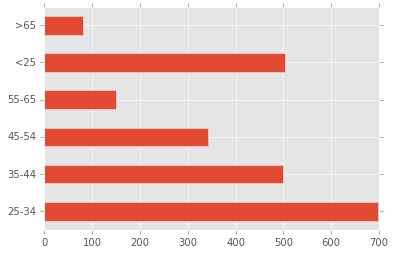

In [167]:
graph = pd.Series({'<25': 503,'25-34':697,'35-44':499,'45-54':342,'55-65':149,'>65':80})
graph.plot(kind = 'barh')

In [168]:
df_race.sum()

Asian                27.0
Black               508.0
Latino              319.0
Native American      16.0
Pacific Islander      3.0
Unknown             706.0
White               766.0
dtype: float64

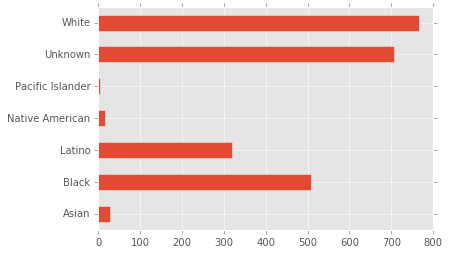

In [169]:
graph = pd.Series({'Asian': 27,'Black': 508, 'Latino': 319, 'Native American': 16, 'Pacific Islander': 3, 'Unknown': 706, 'White': 766})
graph.plot(kind = 'barh')

In [170]:
df_priors.sum()

priors_No          116.0
priors_Unclear    1795.0
priors_Yes         434.0
dtype: float64

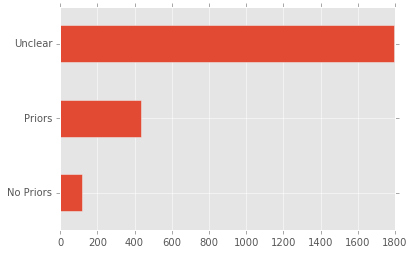

In [171]:
graph = pd.Series({'No Priors': 116, 'Unclear': 1795, 'Priors': 434})
graph.plot(kind = 'barh')

In [172]:
df_armed.sum()

armed_No          275.0
armed_Unclear     597.0
armed_Yes        1473.0
dtype: float64

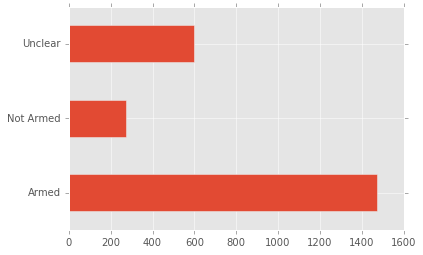

In [173]:
graph = pd.Series({'Armed' : 1473, 'Not Armed': 275, 'Unclear': 597})
graph.plot(kind = 'barh')

In [174]:
df_red_blue.sum()

blue    1090.0
red     1255.0
dtype: float64

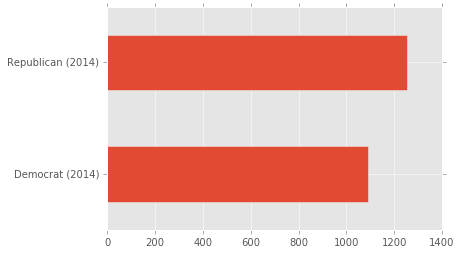

In [175]:
graph = pd.Series({'Republican (2014)': 1255, 'Democrat (2014)': 1090})
graph.plot(kind = 'barh')

In [176]:
df_den.sum()

den_110-250    437.0
den_50-110     789.0
den_<50        217.0
den_>250       902.0
dtype: float64

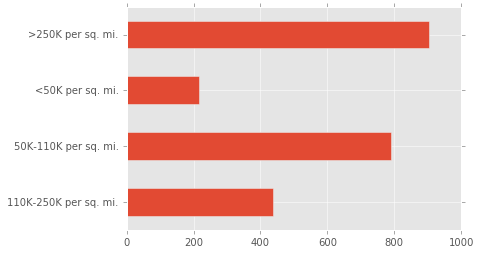

In [177]:
graph = pd.Series({'<50K per sq. mi.': 217, '>250K per sq. mi.': 902, '50K-110K per sq. mi.': 789, '110K-250K per sq. mi.':437})
graph.plot(kind = 'barh')

In [178]:
df_income_range.sum()

200000-400000     506.0
75000-200000      412.0
<75000             90.0
>400000          1337.0
dtype: float64

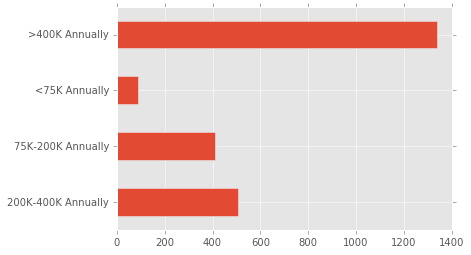

In [179]:
graph = pd.Series({'<75K Annually': 90, '>400K Annually': 1337, '75K-200K Annually': 412, '200K-400K Annually': 506})
graph.plot(kind = 'barh')


In [180]:
df_fired.sum()

fired_No          119.0
fired_Unclear    1562.0
fired_Yes         664.0
dtype: float64

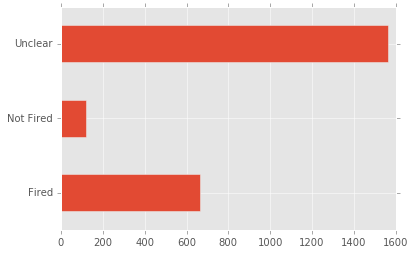

In [181]:
graph = pd.Series({'Fired': 664, 'Not Fired': 119, 'Unclear': 1562})
graph.plot(kind = 'barh')

>### Feature Correlations

In [182]:
df9 = pd.concat([df_income_range, df_den], axis = 1).corr()[['den_110-250', 'den_50-110', 'den_<50', 'den_>250']]
df9

,den_110-250,den_50-110,den_<50,den_>250
200000-400000,-0.035395,0.429474,-0.167505,-0.289003
75000-200000,-0.007994,0.079159,0.494478,-0.365008
<75000,-0.010101,-0.076489,0.326868,-0.112323
>400000,0.039476,-0.388037,-0.367773,0.564322
den_110-250,1.000000,-0.340789,-0.152825,-0.378374
den_50-110,-0.340789,1.000000,-0.227393,-0.562994
den_<50,-0.152825,-0.227393,1.000000,-0.252473
den_>250,-0.378374,-0.562994,-0.252473,1.000000


These variables are not as highly correlated as I was expecting, especially within the more average ranges. Where there actually seems to be correlations is within the extremes: 

Population density of less than 50K per square mile is highly correlated with an income range of 70K to 200K per year and is quite highly correlated with an income range of less than 75K per year. As one would anticipate it is negatively correlated with the other two income ranges. 

At the other end of the spectrum, a population density of greater than 250K per square mile is highly correlated an income range of > 400K per year. It is negatively correlated with all other income ranges. The most negatively correlated with middle income (between 75K to 200K per year) this is indicative of wealth disparity that is generally seen in populous / urban areas. 


In [183]:
df10 = pd.concat([df_red_blue, df_den], axis = 1).corr()[['den_110-250', 'den_50-110', 'den_<50', 'den_>250']]
df10

,den_110-250,den_50-110,den_<50,den_>250
blue,-0.132020,-0.327057,0.026951,0.407249
red,0.132020,0.327057,-0.026951,-0.407249
den_110-250,1.000000,-0.340789,-0.152825,-0.378374
den_50-110,-0.340789,1.000000,-0.227393,-0.562994
den_<50,-0.152825,-0.227393,1.000000,-0.252473
den_>250,-0.378374,-0.562994,-0.252473,1.000000


The political leaning of states in 2014 were correlated with population density as follows: 

Democratic (blue) leaning states were positively correlated with populuation density on the extreme ends of the spectrum, less than 50K per square mile and greater than 250K per square mile.

Alternatively Republican (red) learning states were positively correlated with more average population density ranges, between 50K-110K people per square mile and 110K to 250K people per square mile. 

In [184]:
df11 = pd.concat([df_red_blue, df_income_range], axis = 1).corr()[['red', 'blue']]
df11

,red,blue
blue,-1.000000,1.000000
red,1.000000,-1.000000
200000-400000,0.017040,-0.017040
75000-200000,0.174130,-0.174130
<75000,0.061567,-0.061567
>400000,-0.171909,0.171909


The political leaning of states in 2014 were correlated with income ranges as follows: 

Democratic (blue) leaning states were only positively correlated with the high income range, of greater than 400K earned per year.

Alternatively Republican (red) learning states were positively correlated with all other income ranges: less than 75K earned per year, between 70K-200K earned per year, and between 200K and 400K earned per year. 

It is intriguing that this does not directly parallel the correlations with population density. I suspect that because these are are based on averages that are highly subject to outliers this might be shifting the correlations such that a correlation cannot be seen for blue states and lower income populations despite a correlation with the population density that is correlated with lower income populations.

In [185]:
df12 = pd.concat([df_armed, df_priors], axis = 1).corr()[['armed_No','armed_Unclear','armed_Yes']]
df12

,armed_No,armed_Unclear,armed_Yes
armed_No,1.000000,-0.213009,-0.473723
armed_Unclear,-0.213009,1.000000,-0.759556
armed_Yes,-0.473723,-0.759556,1.000000
priors_No,0.094109,-0.061088,-0.007588
priors_Unclear,-0.079769,0.120186,-0.055226
priors_Yes,0.034485,-0.097018,0.064491


These variables are not that correlated, where there are positive and negative correlations the correlations are not high. 

But where they exist they can be summarized as follows:

 -- the victim of the fatal encounter with law enforcement NOT BEING ARMED is positively correlated with no priors and priors.
 
 -- a lack of clarity around whether or not the victim was armed is positively correated with a lack of clarity around whether or not they had priors.
 
 -- the victim of the fatal encounter with law enforcement BEING ARMED is only positively correlated with this victim also having priors. 

In [186]:
df13 = pd.concat([df_armed, df_red_blue], axis = 1).corr()[['armed_No','armed_Unclear','armed_Yes']]
df13

,armed_No,armed_Unclear,armed_Yes
armed_No,1.000000,-0.213009,-0.473723
armed_Unclear,-0.213009,1.000000,-0.759556
armed_Yes,-0.473723,-0.759556,1.000000
blue,0.005779,0.002950,-0.006507
red,-0.005779,-0.002950,0.006507


The data available to me indicates that there is a positive correlation between the victim of fatal encounters with law enforcement being armed and being located in a conservatively leaning State. 

The data also indicates the opposite correlation, that there is a very slight positive correlation between the victim of fatal encounters with law enforcement not being armed and being located in a more liberally leaning state. 

An inference could be made between this and the fact that there were slightly more fatal encounters in conservatively leaning states, about 250 more but I do not think this is entirely justified there are assuredly many confounding factors.



>## Crosstabs. 

In [187]:
pd.crosstab([df_new.fired_Yes, df_new.fired_Unclear], df_new.Black, margins = True)


Black                     0.0  1.0   All
fired_Yes fired_Unclear                 
0.0       0.0              90   29   119
          1.0            1229  333  1562
1.0       0.0             518  146   664
All                      1837  508  2345

In [188]:
pd.crosstab([df_new.fired_Yes, df_new.fired_Unclear], df_new.White, margins = True)

White                     0.0  1.0   All
fired_Yes fired_Unclear                 
0.0       0.0              81   38   119
          1.0            1078  484  1562
1.0       0.0             420  244   664
All                      1579  766  2345

In [189]:
pd.crosstab([df_new.fired_Yes, df_new.fired_Unclear], df_new.Latino, margins = True)

Latino                    0.0  1.0   All
fired_Yes fired_Unclear                 
0.0       0.0             101   18   119
          1.0            1334  228  1562
1.0       0.0             591   73   664
All                      2026  319  2345

In [190]:
pd.crosstab([df_new.fired_Yes, df_new.fired_Unclear], df_new.Unknown, margins = True)

Unknown                   0.0  1.0   All
fired_Yes fired_Unclear                 
0.0       0.0              87   32   119
          1.0            1077  485  1562
1.0       0.0             475  189   664
All                      1639  706  2345

>### Political Leaning of State Crosstab

In [191]:
pd.crosstab([df_new.fired_Yes, df_new.fired_Unclear], df_new.red, margins = True)

red                       0.0   1.0   All
fired_Yes fired_Unclear                  
0.0       0.0              65    54   119
          1.0             760   802  1562
1.0       0.0             265   399   664
All                      1090  1255  2345

>### Priors Crosstab

In [192]:
pd.crosstab([df_new.fired_Yes, df_new.fired_Unclear], df_priors.priors_Yes, margins = True)

priors_Yes                0.0  1.0   All
fired_Yes fired_Unclear                 
0.0       0.0              87   32   119
          1.0            1321  241  1562
1.0       0.0             503  161   664
All                      1911  434  2345

>### Armed Crosstab

In [193]:
pd.crosstab([df_new.fired_Yes, df_new.fired_Unclear], df_armed.armed_Yes, margins = True)

armed_Yes                0.0   1.0   All
fired_Yes fired_Unclear                 
0.0       0.0             55    64   119
          1.0            637   925  1562
1.0       0.0            180   484   664
All                      872  1473  2345

The above two crosstabs reveal an interesting aspect about the data: From the priors crosstab it is clear that more offciers were fired in instances where the victim did not have priors and the armed crosstab reveals that more officers were fired in instances where the subject was armed than in instances where the subject was not.

This seeming discrepancy is explained by histograms above and counts below, there were significantly more victims that were definitively armed than there were instances where the victim definitively had priors. 

In [194]:
df_armed.sum()

armed_No          275.0
armed_Unclear     597.0
armed_Yes        1473.0
dtype: float64

In [195]:
df_priors.sum()

priors_No          116.0
priors_Unclear    1795.0
priors_Yes         434.0
dtype: float64

>### Feature Correlations with Fired/Not and individual Logistic Regression models. 

In [196]:
df1 = pd.concat([df_age_range, df_fired], axis = 1).corr()[['fired_No', 'fired_Unclear', 'fired_Yes']]
df1

,fired_No,fired_Unclear,fired_Yes
25-34,0.006929,-0.008449,0.005468
35-44,0.012711,0.005782,-0.012245
45-54,-0.040490,-0.037931,0.059430
55-65,-0.012435,-0.008335,0.014783
<25,-0.002487,0.013113,-0.012515
>65,0.031472,0.003547,-0.019045
fired_No,1.000000,-0.326566,-0.145315
fired_Unclear,-0.326566,1.000000,-0.887687
fired_Yes,-0.145315,-0.887687,1.000000


In [197]:
logit = smf.Logit(df_fired['fired_Yes'], df_age_range[df_age_range.columns[1:]])

result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.630663
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              fired_Yes   No. Observations:                 2345
Model:                          Logit   Df Residuals:                     2340
Method:                           MLE   Df Model:                            4
Date:                Mon, 19 Sep 2016   Pseudo R-squ.:                -0.05832
Time:                        09:40:06   Log-Likelihood:                -1478.9
converged:                       True   LL-Null:                       -1397.4
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
35-44         -0.9817      0.101     -9.765      0.000        -1.179    -0.785
45-54         -0.6280      0.

Every age range is negatively correlated with the cop being fired, this is to be expected as the majority of the police officers involved were not fired or it was unclear whether or not they were fired. 
The age range of 25-35 was used as baseline in this case so the coefficients demonstrate how much the odds of the police officer involved being fired increase as the age range changes from 25-35 in either direction. A summary of how these changes impact the odds of the police officer involved being fired can be seen below.
The victim being over 60 years old is the most negatively correlated with the cop being fired. I wonder if this is impacted by value counts. 


In [198]:
print np.e**-.9817
print np.e**-.6280
print np.e**-.8061
print np.e**-.9827
print np.e**-1.1664

0.374673612001
0.533658050503
0.446596400229
0.374299125663
0.311486275847


 Age Range | Impact on Odds of Police Officer being Fired
---|---
35-44 | Increased by 37 % 
45-55 | Increased by 53 %
55-65 | Increased by 45 %
Younger than 25 | Increased by 37%
Older than 65 | Increased by 31 %


In [199]:
df2 = pd.concat([df_race, df_fired], axis = 1).corr()[['fired_No', 'fired_Unclear', 'fired_Yes']]
df2

,fired_No,fired_Unclear,fired_Yes
Asian,0.011471,0.000130,-0.005724
Black,0.015191,-0.011804,0.004956
Latino,0.010269,0.040921,-0.047838
Native American,-0.019164,0.014746,-0.006100
Pacific Islander,-0.008275,0.000043,0.003986
Unknown,-0.016209,0.029045,-0.022507
White,-0.003611,-0.050575,0.054699
fired_No,1.000000,-0.326566,-0.145315
fired_Unclear,-0.326566,1.000000,-0.887687
fired_Yes,-0.145315,-0.887687,1.000000


In [200]:
logit = smf.Logit(df_fired['fired_Yes'], df_race[df_race.columns[1:]])

result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.595053
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              fired_Yes   No. Observations:                 2345
Model:                          Logit   Df Residuals:                     2339
Method:                           MLE   Df Model:                            5
Date:                Mon, 19 Sep 2016   Pseudo R-squ.:                0.001436
Time:                        09:40:06   Log-Likelihood:                -1395.4
converged:                       True   LL-Null:                       -1397.4
                                        LLR p-value:                    0.5473
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Black               -0.9080      0.098     -9.262      0.000        -1.100    -0.716
Latino     

Asian was used as baseline in the above model as such the coefficients should be interpreted based on how much they increase the odds of the police officer involved being fired. 
What is already clear is that Native American and Pacific Islander are not significant in predicting whether or not the police officer involved was fired. 
Latino, Race-Unknown, Black, and White are all negatively correlated with the police officer involved being fired in that order. 
Latino is the most negatively correlated with the police officer being fired. 

In [201]:
print np.e**-.9080
print np.e**-1.2149
print np.e**-1.0063
print np.e**-.7605



0.403330078067
0.296739686779
0.365569085952
0.467432652245


 Race | Impact on Odds of Police Officer being Fired
---|---
Black | Increased by 40 % 
Latino | Increased by 30 %
Unknown | Increased by 37 %
White | Increased by 47 %

#* These are increases compared to Asian as baseline.

In [202]:
model = linear_model.LogisticRegression()
model = model.fit(df_race, df_fired['fired_Yes'])
model.predict_proba([0,0,0,0,0,0,0])

c:\Users\morgane1\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.69828028,  0.30171972]])

In [203]:
model.predict_proba([1,0,0,0,0,0,0])

c:\Users\morgane1\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.7341835,  0.2658165]])

In [204]:
print model.predict_proba([0,1,0,0,0,0,0])
print model.predict_proba([0,0,1,0,0,0,0])
print model.predict_proba([0,0,0,1,0,0,0])
print model.predict_proba([0,0,0,0,1,0,0])
print model.predict_proba([0,0,0,0,0,1,0])
print model.predict_proba([0,0,0,0,0,0,1])

[[ 0.71246405  0.28753595]]
[[ 0.77000248  0.22999752]]
[[ 0.73772237  0.26227763]]
[[ 0.68591428  0.31408572]]
[[ 0.73205953  0.26794047]]
[[ 0.68156417  0.31843583]]


c:\Users\morgane1\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\Users\morgane1\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\Users\morgane1\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single

In [205]:
df3 = pd.concat([df_priors, df_fired], axis = 1).corr()[['fired_No', 'fired_Unclear', 'fired_Yes']]
df3

,fired_No,fired_Unclear,fired_Yes
priors_No,0.278786,-0.151235,0.022497
priors_Unclear,-0.188419,0.180017,-0.096648
priors_Yes,0.049911,-0.111962,0.092885
fired_No,1.000000,-0.326566,-0.145315
fired_Unclear,-0.326566,1.000000,-0.887687
fired_Yes,-0.145315,-0.887687,1.000000


In [206]:
logit = smf.Logit(df_fired['fired_Yes'], df_priors[df_priors.columns[1:]])

result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.594230
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              fired_Yes   No. Observations:                 2345
Model:                          Logit   Df Residuals:                     2343
Method:                           MLE   Df Model:                            1
Date:                Mon, 19 Sep 2016   Pseudo R-squ.:                0.002818
Time:                        09:40:06   Log-Likelihood:                -1393.5
converged:                       True   LL-Null:                       -1397.4
                                        LLR p-value:                  0.005013
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
priors_Unclear    -1.0509      0.054    -19.507      0.000        -1.156    -0.945
priors_Yes       

Baseline is that it is the victim of the police involved fatality didn't have priors. 
Both variables are significant. It seems that it being unclear whether or not the victim had priors makes it twice as likely
that the officer involved does get fired than if it is definitive that the victim did have priors. 

This is the opposite of what I would have anticipated, I would have thought that if the victim definitely had priors, or a record of some kind the officer involved would have recieved more sympathy, legally. But, the data seems to indicate that an input of 1 for prior_Yes, drives the target variable of fired_Yes to zero less rapidly than does an input of 1 for prior_Unclear. 


In [207]:
print np.e**-1.0509
print np.e**-0.5281

0.349622946819
0.589724382226


 Priors | Impact on Odds of Police Officer being Fired
---|---
Priors_Unclear | Increased by 35% 
Priors_Yes | Increased by 59 %


#* These are increases compared to No Priors as baseline.

In [208]:
df4 = pd.concat([df_armed, df_fired], axis = 1).corr()[['fired_No', 'fired_Unclear', 'fired_Yes']]
df4

,fired_No,fired_Unclear,fired_Yes
armed_No,0.145203,-0.039843,-0.029030
armed_Unclear,-0.059300,0.146003,-0.123944
armed_Yes,-0.043214,-0.105077,0.131044
fired_No,1.000000,-0.326566,-0.145315
fired_Unclear,-0.326566,1.000000,-0.887687
fired_Yes,-0.145315,-0.887687,1.000000


In [209]:
logit = smf.Logit(df_fired['fired_Yes'], df_armed[df_armed.columns[1:]])

result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.601904
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              fired_Yes   No. Observations:                 2345
Model:                          Logit   Df Residuals:                     2343
Method:                           MLE   Df Model:                            1
Date:                Mon, 19 Sep 2016   Pseudo R-squ.:                -0.01006
Time:                        09:40:06   Log-Likelihood:                -1411.5
converged:                       True   LL-Null:                       -1397.4
                                        LLR p-value:                     1.000
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
armed_Unclear    -1.4657      0.105    -13.981      0.000        -1.671    -1.260
armed_Yes        -0.

In [243]:
df_armed.sum()

armed_No          275.0
armed_Unclear     597.0
armed_Yes        1473.0
dtype: float64

The coefficients here are kind of the opposite of what I would have anticipated. They are all negatively correlated, which we would expect because the response variable is about 70 percent 0 (fired_no and fired_unclear) but the coefficients show that if it is unclear whether the victim was armed or it is definitively known that the victim was not armed then positive input of 1 for these variables drives the target variable to zero (meaning the officer would not be fired) faster than if it is definitely known that the victim was armed. I would have thought that if the victim was definitely armed the officer involed ouwld be less likely to be fired. 

In [211]:
print np.e**-1.1132
print np.e**-1.4919
print np.e**-.7146

0.328506057943
0.224944854034
0.489387827782


In [212]:
df5 = pd.concat([df_red_blue, df_fired], axis = 1).corr()[['fired_No', 'fired_Unclear', 'fired_Yes']]
df5

,fired_No,fired_Unclear,fired_Yes
blue,0.037735,0.061555,-0.082817
red,-0.037735,-0.061555,0.082817
fired_No,1.000000,-0.326566,-0.145315
fired_Unclear,-0.326566,1.000000,-0.887687
fired_Yes,-0.145315,-0.887687,1.000000


In [213]:
logit = smf.Logit(df_fired['fired_Yes'], df_red_blue[df_red_blue.columns[1:]])

result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.656836
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              fired_Yes   No. Observations:                 2345
Model:                          Logit   Df Residuals:                     2344
Method:                           MLE   Df Model:                            0
Date:                Mon, 19 Sep 2016   Pseudo R-squ.:                 -0.1022
Time:                        09:40:07   Log-Likelihood:                -1540.3
converged:                       True   LL-Null:                       -1397.4
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
red           -0.7633      0.061    -12.592      0.000        -0.882    -0.645


Red states are negatively correlated with the officer involved in the fatality being fired. This is compared to democratic states as baseline. The odds ratio below reveals that if the fatal encounter occured in a red state the odds of the officer involved being fired increases by 47 percent. 
This does not entirely align with what I expected and actually leaves me feeling a little unsure of my interpretation. However, I suppose if democratic is associated generally with a larger government, greater sympathy might be had toward government officals. 
This is also intriguing becuase it seems like that the majority of the uproar socially comes from the more democratic side however it appears that there might be some legislative inertia in these states that makes it difficult for the police officer involved being fired, and vice versa. OR, my interpretation is backwards. 
Another thing to consider might be sympathy around guns and use of guns, the conservative mindset generally leans toward protecting the right to own and use guns. I am trying to sort through how this might be related aside from the fact that I would have anticipated more leniency toward guns and their uses in Republican states but this doesn't seem to be the case. 

Would also like to look at percentage of officers involved that were fired from blue states versus red states. 

In [214]:
print np.e**-.7633

0.466125671446


 Political Leaning of State | Impact on Odds of Police Officer being Fired
---|---
Republican | Increased by 47% 

#* These are increases compared to Democratic / Blue State as baseline.

In [215]:
df6 = pd.concat([df_den, df_fired], axis = 1).corr()[['fired_No', 'fired_Unclear', 'fired_Yes']]
df6

,fired_No,fired_Unclear,fired_Yes
den_110-250,-0.000879,-0.014130,0.015219
den_50-110,-0.008384,0.002772,0.001182
den_<50,-0.020195,-0.054741,0.067140
den_>250,0.020874,0.041223,-0.053320
fired_No,1.000000,-0.326566,-0.145315
fired_Unclear,-0.326566,1.000000,-0.887687
fired_Yes,-0.145315,-0.887687,1.000000


In [216]:
logit = smf.Logit(df_fired['fired_Yes'], df_den[df_den.columns[1:]])

result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.608722
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              fired_Yes   No. Observations:                 2345
Model:                          Logit   Df Residuals:                     2342
Method:                           MLE   Df Model:                            2
Date:                Mon, 19 Sep 2016   Pseudo R-squ.:                -0.02150
Time:                        09:40:07   Log-Likelihood:                -1427.5
converged:                       True   LL-Null:                       -1397.4
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
den_50-110    -0.9252      0.079    -11.718      0.000        -1.080    -0.770
den_<50       -0.4986      0.

All the various population density ranges of the 50 states are significant and they're all negatively correlated with the police officer involved being fired. The population density of 110-250 thousand people per square mile was used as baseline so the increase in the odds of the officer involved being fired can be understood as the population density deviates from that range. 

The highest population density is most negatively correlated with the officer involved being fired and this is as I would have anticipated. It should be noted that looking at population density on the scale of state isn't very interpretable and is a very gross approximation. I didn't have time to look at this by city but doing so would have a lot more value and I may try to cut the data that way at a later date. 

Regardless the order of correlations was more or less as would have anticipated, with the most populous places leading to the least number of police officers involved being fired. With the median income level's range being the baseline. My reasoning here is that populous implies urban meaning which would indicate that probably more samples came from these areas and given that 70 percent of all samples did not lead the officer involved being fired one might anticipate this high negative correlation. 

Should look at value counts for number of samples from each -- this will be taken care of with histograms.


In [217]:
print np.e**-.9252
print np.e**-.4986
print np.e**-1.0839

0.396452120721
0.607380397314
0.338273682365


 Range of Average State Population Density | Impact on Odds
---|---
50K-110K People / Sq. Mi. | Increased by 40% 
Less than 50K People / Sq. Mi. | Increased by 61%
Greater than 250K People / Sq. Mi. | Increased by 34%


#* These are increases compared to 110K to 250K People per square mile range as baseline.

In [218]:
df7 = pd.concat([df_income_range, df_fired], axis = 1).corr()[['fired_No', 'fired_Unclear', 'fired_Yes']]
df7

,fired_No,fired_Unclear,fired_Yes
200000-400000,0.006246,0.013089,-0.016744
75000-200000,-0.004633,-0.074685,0.080436
<75000,-0.005736,-0.013880,0.017323
>400000,0.000597,0.051922,-0.054642
fired_No,1.000000,-0.326566,-0.145315
fired_Unclear,-0.326566,1.000000,-0.887687
fired_Yes,-0.145315,-0.887687,1.000000


In [219]:
logit = smf.Logit(df_fired['fired_Yes'], df_income_range[df_income_range.columns[1:]])

result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.616441
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              fired_Yes   No. Observations:                 2345
Model:                          Logit   Df Residuals:                     2342
Method:                           MLE   Df Model:                            2
Date:                Mon, 19 Sep 2016   Pseudo R-squ.:                -0.03445
Time:                        09:40:07   Log-Likelihood:                -1445.6
converged:                       True   LL-Null:                       -1397.4
                                        LLR p-value:                     1.000
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
75000-200000    -0.5682      0.103     -5.542      0.000        -0.769    -0.367
<75000          -0.7436

Again, all variables are negatively correlated with the officer involved in the fatal encouter being fired and all relevant variables are significant compared to the baseline of the average household income range of 200000 to 400000. 

It should definitely be noted that high density areas are probably correlated with high income. Similar to San Francisco. 
And there is also probably a corrleation between low density and the political leaning of the state. 

An average household income of greater than 400000 was the most negatively correlated with the police officer involved being fired. All disclaimers aside about the quality of the data and the gross generalizations and wild assumptions but solely for the fun of theorizing it this implies that higher income populations are more sympathic to police and less sympathetic to lower income populations.  

The same issue exists here as it did above, that looking at average income of the state is probably too gross of a classification, this should probably be looked at on a more granular scale and then be grouped by the larger classification of republican / democrat. I think because of this, this is largely not interpretable. I am starting to think this because average income would be shifted by cost of living etc., (particularly, I think this because of where we live) it seems as though household income could be much more relative than I initally really gave it credit for. 

All that aside, what the data suggests based on the analysis done is that, the police officer involved in a fatal encounter is more likely to be fired if the fatal encounter occured in both a less populous state (from above) and a less wealthy state. These seems like correlated variables now that I am thinking about that, I am not sure how to check and see if this is or isn't the case right now. 

In [220]:
print np.e**-.5682
print np.e**-.7436
print np.e**-1.0367


0.56654430119
0.475399393417
0.354623009089


 Range of Average State Household Income | Impact on Odds
---|---
75K to 200K Household Income Range | Increased by 57% 
Less than 75K Household Income Range | Increased by 48%
Greater than 400K Household Income Range | Increased by 35%


#* These are increases compared to the average household income range of 200K - 400K per year as baseline.

In [221]:
X = df_new[['Black', 'Latino', 'Unknown', 'White', 'priors_Unclear', 'priors_Yes', 'armed_No','armed_Unclear','armed_Yes','red','blue']]
y = df.fired

model = linear_model.LogisticRegression().fit(X,y)

In [222]:
model.score(X, y)

0.6682302771855011

In [223]:
y_hat = model.predict(X)

pd.crosstab(y_hat , y, rownames = ['y_hat'], colnames = ['y'])

y,No,Unclear,Yes
y_hat,,,
No,14,4,11
Unclear,88,1506,606
Yes,17,52,47


The table above reveals some insights about the model's efficacy. 
The Unclear columns can more or less be ignored, the model does quite well at predicting the clarity of whether or not the officer involved was fired as we would expect considering the majority of the samples are in this category. 
The model over predicts that the officer involved would be fired. And under predicts that the officer involved wouldnt be fired.
This is curious and kind of awesome and I'm not going to read into this too much. 
One thing this also makes clear is that more data would really help, this was evident from the beginning and is more evident now. 


>### Decision Tree: create feature matrix with all significant variables and response vectors of whether the officer involved was fired or not. 

In [224]:
X = df_new.drop(['fired_No','fired_Yes','fired_Unclear','Native American','Pacific Islander'], axis = 1)

In [225]:
X

,cause_death,State,Gender,Age,Race,...,den_>250,200000-400000,75000-200000,<75000,>400000
0,Car Accident,New Jersey,Female,64.0,Asian,...,1.0,0.0,0.0,0.0,1.0
1,Car Accident,New Jersey,Female,34.0,Black,...,1.0,0.0,0.0,0.0,1.0
2,Car Accident,New Jersey,Male,41.0,Black,...,1.0,0.0,0.0,0.0,1.0
3,Other,New Jersey,Male,27.0,Black,...,1.0,0.0,0.0,0.0,1.0
4,Physical Confrontation,New Jersey,Male,32.0,Black,...,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2340,Shooting,Wyoming,Male,43.0,Unknown,...,0.0,0.0,0.0,1.0,0.0
2341,Shooting,Wyoming,Male,40.0,Unknown,...,0.0,0.0,0.0,1.0,0.0
2342,Shooting,Wyoming,Male,26.0,White,...,0.0,0.0,0.0,1.0,0.0
2343,Shooting,Wyoming,Male,55.0,White,...,0.0,0.0,0.0,1.0,0.0


In [226]:
list(df_new.columns.values)

['cause_death',
 'State',
 'Gender',
 'Age',
 'Race',
 'armed',
 'priors',
 'fired',
 'age_range',
 'red_blue',
 'income_range',
 'df_den',
 '25-34',
 '35-44',
 '45-54',
 '55-65',
 '<25',
 '>65',
 'Asian',
 'Black',
 'Latino',
 'Native American',
 'Pacific Islander',
 'Unknown',
 'White',
 'priors_No',
 'priors_Unclear',
 'priors_Yes',
 'armed_No',
 'armed_Unclear',
 'armed_Yes',
 'blue',
 'red',
 'den_110-250',
 'den_50-110',
 'den_<50',
 'den_>250',
 '200000-400000',
 '75000-200000',
 '<75000',
 '>400000',
 'fired_No',
 'fired_Unclear',
 'fired_Yes']

In [227]:
X = df_new.drop(['fired_No','fired_Yes','fired_Unclear','Native American','Pacific Islander',
                 'cause_death','State','Gender','Age','Race','armed','priors','fired','age_range',
                 'income_range','red_blue','df_den'], axis = 1)
y = df_fired['fired_Yes']


In [228]:
X

,25-34,35-44,45-54,55-65,<25,...,den_>250,200000-400000,75000-200000,<75000,>400000
0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2340,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0
2341,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0
2342,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0
2343,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0


In [229]:
model = tree.DecisionTreeClassifier(max_depth = 2,
    min_samples_leaf = 5,
    random_state = 0).\
        fit(X, y)

In [230]:
sorted(zip(model.feature_importances_, X.columns.values), reverse = True)

[(0.59622856115621392, 'armed_Yes'),
 (0.21283290873705071, '45-54'),
 (0.19093853010673542, 'priors_Unclear'),
 (0.0, 'red'),
 (0.0, 'priors_Yes'),
 (0.0, 'priors_No'),
 (0.0, 'den_>250'),
 (0.0, 'den_<50'),
 (0.0, 'den_50-110'),
 (0.0, 'den_110-250'),
 (0.0, 'blue'),
 (0.0, 'armed_Unclear'),
 (0.0, 'armed_No'),
 (0.0, 'White'),
 (0.0, 'Unknown'),
 (0.0, 'Latino'),
 (0.0, 'Black'),
 (0.0, 'Asian'),
 (0.0, '>65'),
 (0.0, '>400000'),
 (0.0, '<75000'),
 (0.0, '<25'),
 (0.0, '75000-200000'),
 (0.0, '55-65'),
 (0.0, '35-44'),
 (0.0, '25-34'),
 (0.0, '200000-400000')]

In [231]:
model = ensemble.RandomForestClassifier(n_estimators = 1000,
        max_features = 4,
        min_samples_leaf = 5,
        oob_score = True,
        random_state = 0).\
    fit(X, y)

In [232]:
y.value_counts() / len(y)

0.0    0.716844
1.0    0.283156
Name: fired_Yes, dtype: float64

In [233]:
model.oob_score_

0.71684434968017052

In [234]:
y_hat = model.predict(X)

pd.crosstab(y_hat , y, rownames = ['y_hat'], colnames = ['y'])

y,0.0,1.0
y_hat,,
0.0,1671,619
1.0,10,45


In [235]:
sorted(zip(model.feature_importances_, X.columns.values), reverse = True)

[(0.070884683567098608, 'armed_Yes'),
 (0.058972194440797654, 'armed_Unclear'),
 (0.054958631185330606, '>400000'),
 (0.050326576977453498, '45-54'),
 (0.05026682601892625, 'red'),
 (0.049425992328375419, 'blue'),
 (0.049283452812432828, 'White'),
 (0.049265211326850675, 'Unknown'),
 (0.049077381082279374, '25-34'),
 (0.043146952467004521, 'priors_Unclear'),
 (0.04242719107430741, 'den_50-110'),
 (0.041129802324406932, 'priors_Yes'),
 (0.040820737366665194, '75000-200000'),
 (0.039629168916436176, 'den_>250'),
 (0.039005321964680248, '200000-400000'),
 (0.037800207974800312, '35-44'),
 (0.036504168965375713, 'Black'),
 (0.036339402060775523, '<25'),
 (0.033382398653685003, 'den_110-250'),
 (0.026896740681898134, 'Latino'),
 (0.023323219905912226, 'den_<50'),
 (0.021842849234485859, '55-65'),
 (0.021835710043677282, 'armed_No'),
 (0.010920803636466371, '<75000'),
 (0.010804746271130023, 'priors_No'),
 (0.010203112152368188, '>65'),
 (0.001526516566379896, 'Asian')]

In [236]:
print cross_validation.cross_val_score(model, X, y, cv = 10).mean()

0.632270181635


In [237]:
X = df_new[['Black', 'Latino', 'Unknown', 'White', 'priors_Unclear', 'priors_Yes', 'armed_No','armed_Unclear','armed_Yes','red','blue']]
y = df_new['fired_Unclear']

In [238]:
model = tree.DecisionTreeClassifier(max_depth = 2,
    min_samples_leaf = 5,
    random_state = 0).\
        fit(X, y)

In [239]:
model = ensemble.RandomForestClassifier(n_estimators = 1000,
        max_features = 4,
        min_samples_leaf = 5,
        oob_score = True,
        random_state = 0).\
    fit(X, y)

In [240]:
sorted(zip(model.feature_importances_, X.columns.values), reverse = True)

[(0.28066173923576609, 'priors_Unclear'),
 (0.14350212856912889, 'armed_Unclear'),
 (0.11003702163208547, 'priors_Yes'),
 (0.085506163683964825, 'armed_Yes'),
 (0.060735556616598331, 'White'),
 (0.054724628299264395, 'blue'),
 (0.054321772956315087, 'red'),
 (0.053228670169475932, 'Unknown'),
 (0.052994790602481835, 'Latino'),
 (0.052626856415364485, 'Black'),
 (0.051660671819555012, 'armed_No')]

In [241]:
model.oob_score_

0.68443496801705761

In [242]:
print cross_validation.cross_val_score(model, X, y, cv = 10).mean()

0.642677713359
